In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

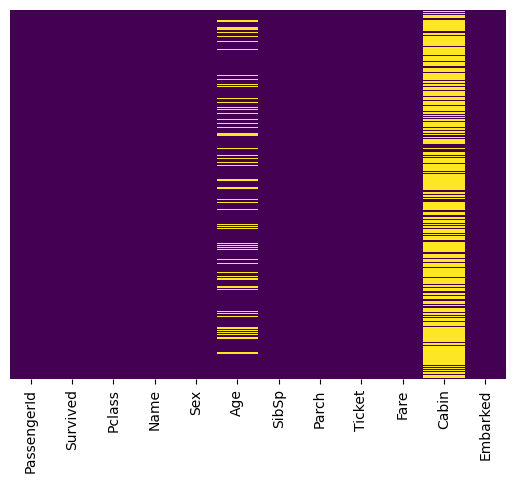

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [10]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

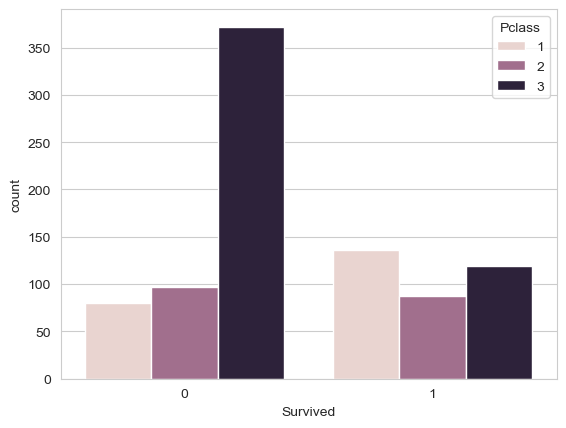

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<Axes: xlabel='Age', ylabel='Count'>

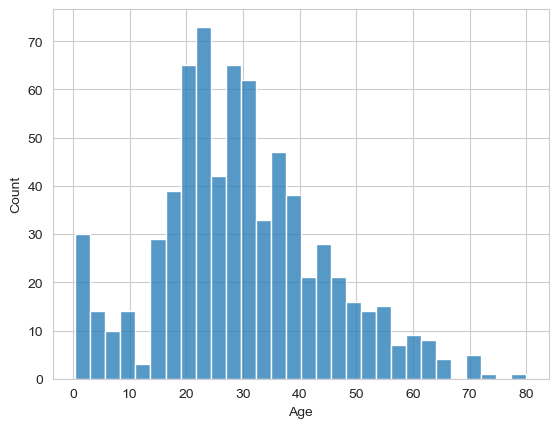

In [16]:
sns.histplot(train["Age"].dropna(), bins=30)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

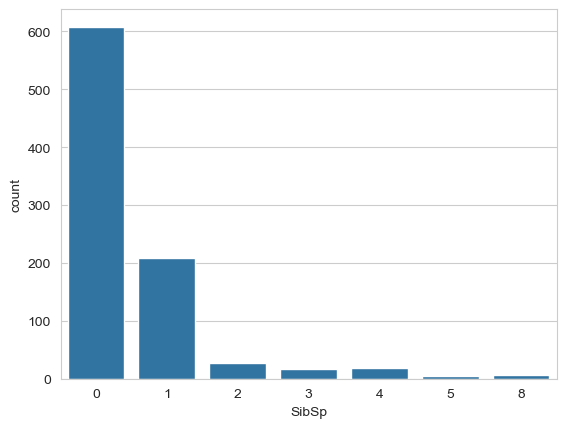

In [18]:
sns.countplot(x="SibSp", data=train)

<Axes: >

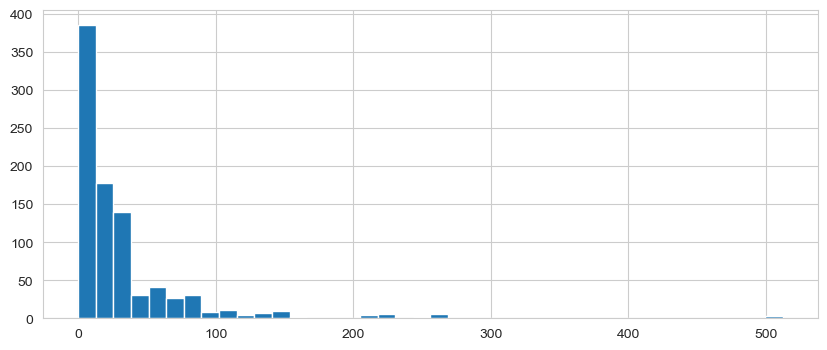

In [21]:
train["Fare"].hist(bins=40, figsize=(10,4))

In [22]:
import cufflinks as cf

In [23]:
cf.go_offline()

In [25]:
# train["Fare"].iplot(kind="hist",bins=50)

## Cleaning Data ##

<Axes: xlabel='Pclass', ylabel='Age'>

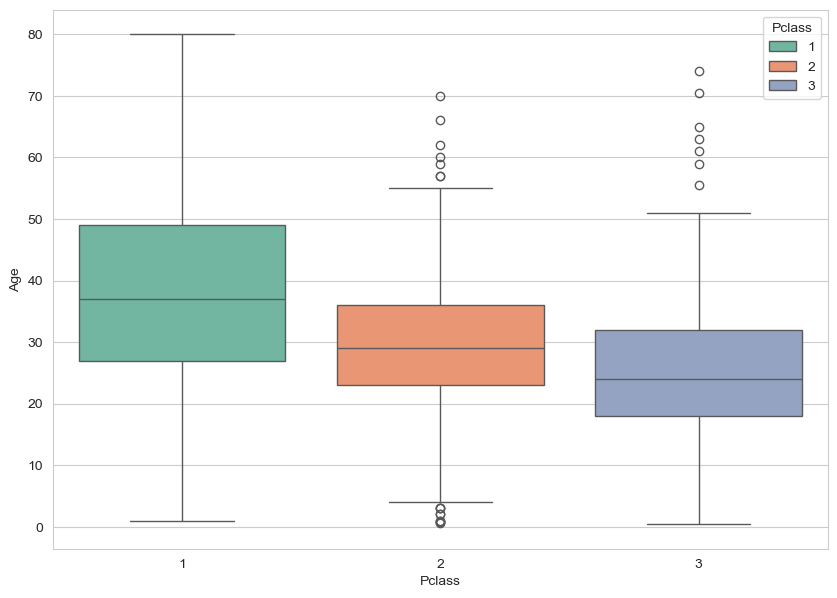

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=train, hue="Pclass", palette="Set2")

In [45]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [46]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

C:\Users\javie\AppData\Local\Temp\ipykernel_5984\1334420608.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\javie\AppData\Local\Temp\ipykernel_5984\1334420608.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

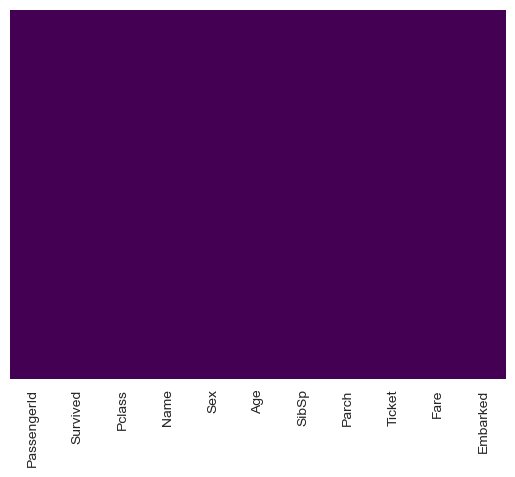

In [51]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [48]:
train.drop("Cabin", axis=1, inplace=True)

In [50]:
train.dropna(inplace=True)

In [54]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [56]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [57]:
train = pd.concat([train,sex,embark],axis=1)

In [60]:
train.drop(['Name', 'Sex','Ticket','Embarked'], axis=1, inplace=True)

In [63]:
train.drop('PassengerId', axis=1, inplace=True)

In [64]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,3.0,1,0,7.2500,True,False,True
1,1,1,1.0,1,0,71.2833,False,False,False
2,1,3,3.0,0,0,7.9250,False,False,True
3,1,1,1.0,1,0,53.1000,False,False,True
4,0,3,3.0,0,0,8.0500,True,False,True


In [65]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel = LogisticRegression(max_iter=500)

In [72]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [73]:
predictions = logmodel.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.86      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.83      0.82      0.82       267



In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
print(confusion_matrix(y_test,predictions))

[[152  11]
 [ 36  68]]
